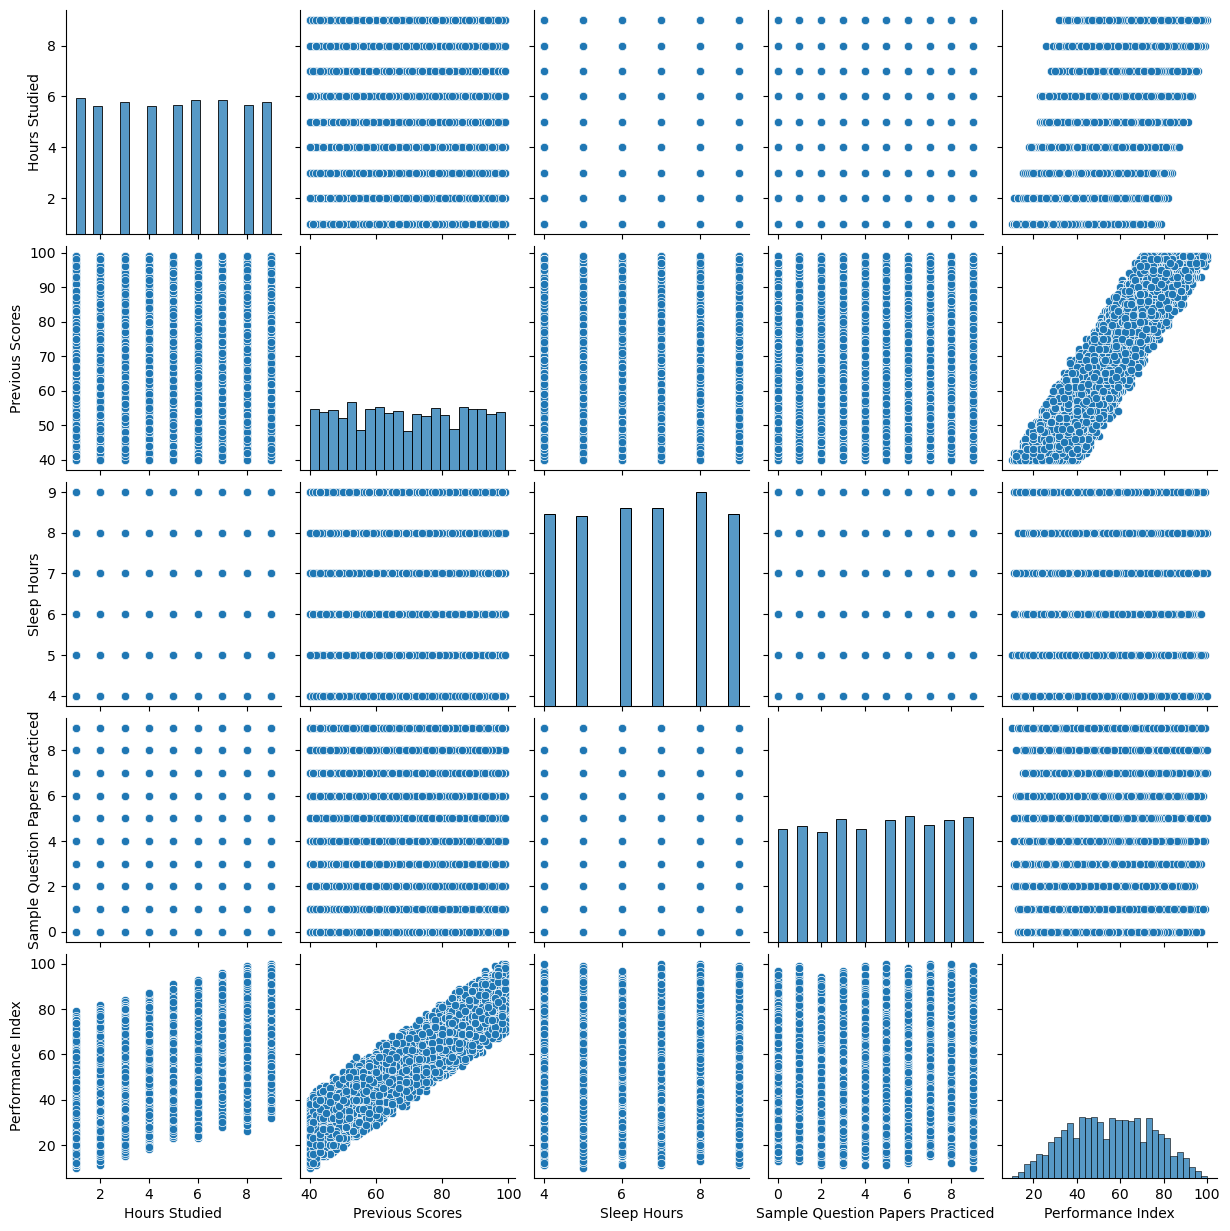

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and review the dataset
data = pd.read_csv('Student_Performance.csv')



# Visualizing the dataset
sns.pairplot(data)
plt.show()

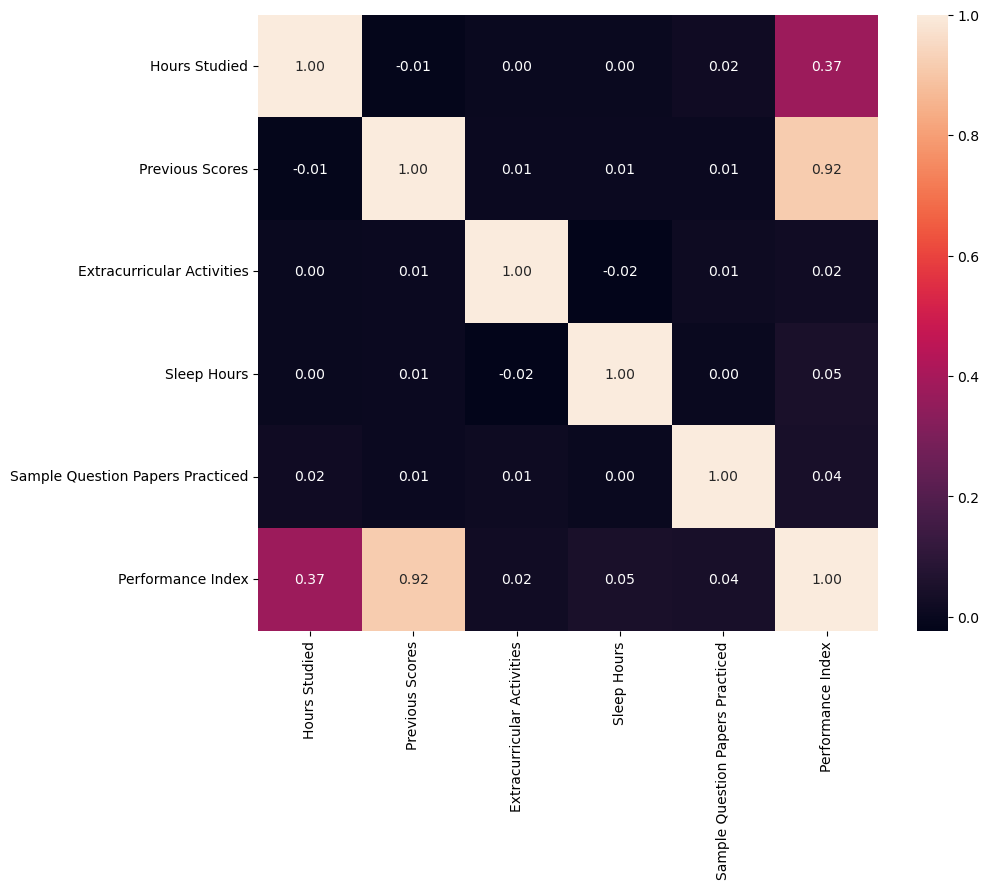

In [4]:

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()


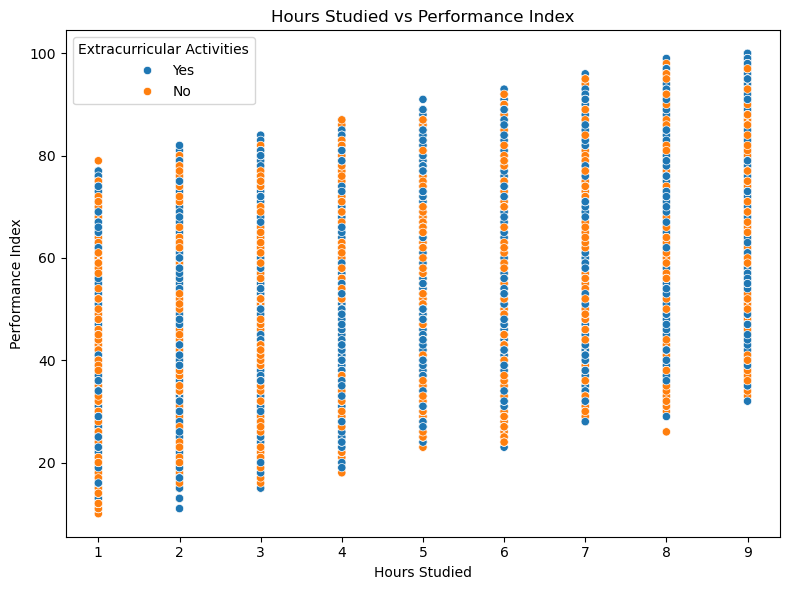

In [13]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours Studied', y='Performance Index', hue='Extracurricular Activities')
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend(title='Extracurricular Activities')
plt.tight_layout()
plt.show()

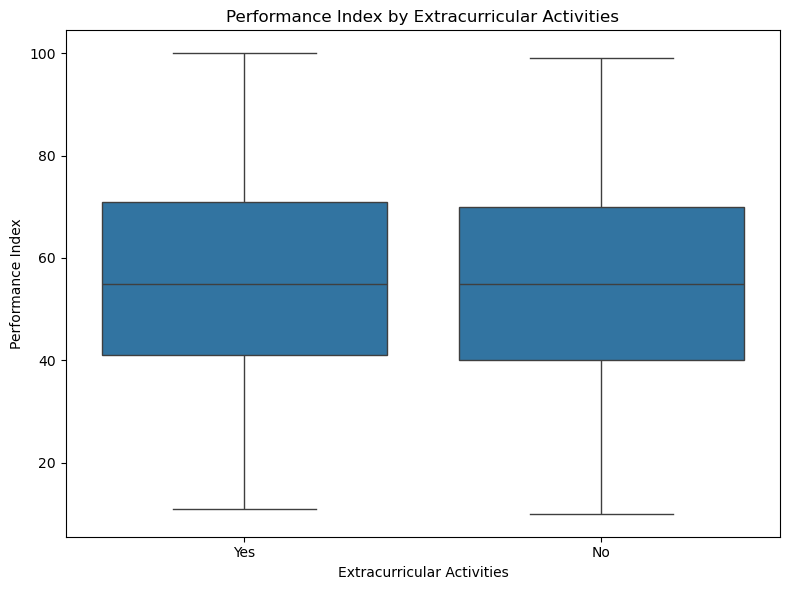

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Extracurricular Activities', y='Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.tight_layout()

plt.show()

In [27]:
# Convert categorical data to numerical data
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [31]:
#prepare for modeling
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2.0205515085050054


In [35]:
# Remove the least correlated feature: Sleep Hours
X_reduced = data.drop(['Performance Index', 'Sleep Hours'], axis=1)
y = data['Performance Index']

# Split the new dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train and evaluate a new model
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

# RMSE
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE after dropping 'Sleep Hours':", rmse2)

RMSE after dropping 'Sleep Hours': 2.1863697932541846


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Use full dataset again (including all features)
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

# Train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train3, y_train3)
y_pred3 = rf_model.predict(X_test3)

# RMSE
rmse3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
print("Random Forest RMSE:", rmse3)

Random Forest RMSE: 2.271307554426923
